In [4]:
# importação de bibliotecas

import pandas as pd                                             # importação de biblioteca para manipulação de dados
import numpy as np                                              # importação de biblioteca para manipulação de numeros
import seaborn as sns                                           # importação de biblioteca para visualização de dados graficamente
import plotly.express as px                                     # importação de biblioteca para visualização de dados graficamente
from sklearn.linear_model import LinearRegression               # importação de biblioteca sklearn para aplicação de regressão linear
from yellowbrick.regressor import ResidualsPlot                 # importação de biblioteca yellowbrick para visualização de dados graficamente

In [5]:
# carregamento de dados

plano_saude = pd.read_csv('./data/plano_saude.csv')

In [6]:
# exploração da base de dados visualizando os registros

plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


In [7]:
# separação de dados

X_plano_saude = plano_saude.values[ :, 0]
y_plano_saude = plano_saude.values[ :, 1]

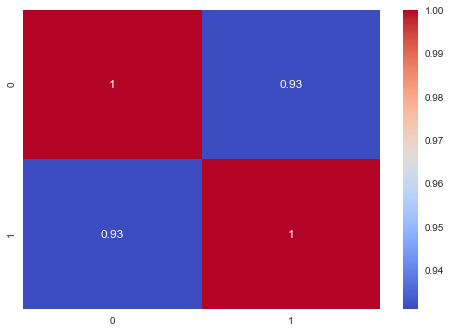

In [8]:
# correlação entre as variáveis

corr = np.corrcoef(X_plano_saude, y_plano_saude)
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [9]:
# trasnformação de variáveis 
# tranformação em matriz

X_plano_saude = X_plano_saude.reshape(-1, 1)
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

In [10]:
# tamanho da base de dados

X_plano_saude.shape

(10, 1)

In [11]:
# aplicação do modelo de regressão linear

regressor = LinearRegression()
regressor.fit(X_plano_saude, y_plano_saude)

LinearRegression()

In [12]:
# b0 iniio da linha de regressão

regressor.intercept_

-558.9490909090907

In [13]:
# b1 coeficiente

regressor.coef_

array([61.86787879])

In [14]:
# teste com aplicação de modelo

previsoes_reg = regressor.predict(X_plano_saude)
previsoes_reg

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [15]:
# tranformação de variáveis
# tranformação em vetor para uso de plot no plotly

# X_plano_saude = X_plano_saude.ravel()

In [16]:
# grafico de dispersão

grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes_reg, name = 'Previsões')
grafico.show()

In [17]:
# calculo com um registro da base de dados

regressor.intercept_ + regressor.coef_ * 18

array([554.67272727])

In [18]:
# teste com um registro fora da base de dados
# necessário transformar o valor em matriz

regressor.predict([[40]])   # [] retorna um vetor, [[]] retorna uma matriz

array([1915.76606061])

In [19]:
# score do modelo

regressor.score(X_plano_saude, y_plano_saude)

0.8666112727879173

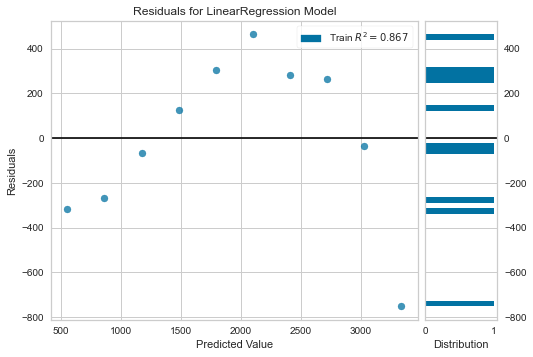

In [21]:
# visualização de residuais, distancia dos dados com a regressão

viz = ResidualsPlot(regressor)
viz.fit(X_plano_saude, y_plano_saude)
viz.poof();